In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
pd.set_option('display.max_columns',None)
import psycopg2
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/Trio_analysis/new_trio_files/Intersection_FMS_DP_VAF_Zygosity.xlsx')
df.head(5)

,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son
0,chr1,69270,A,G,rs201219564,OR4F5,Heterozygous,Heterozygous,Heterozygous,140,88,52,0.371429,0.8380,0.9005,44,16,28,0.636364,104,30,74,0.711538
1,chr1,69511,A,G,rs2691305,OR4F5,Homozygous,Homozygous,Homozygous,147,1,146,0.993197,0.9497,0.9854,133,0,133,1.000000,205,0,205,1.000000
2,chr1,69897,T,C,rs200676709,OR4F5,Heterozygous,Heterozygous,Heterozygous,137,99,38,0.277372,0.7209,0.8049,46,29,17,0.369565,93,28,65,0.698925
3,chr1,924533,A,G,rs112703963,"SAMD11,LOC107985728",Homozygous,Homozygous,Homozygous,93,0,93,1.000000,0.0000,0.0000,40,1,39,0.975000,81,0,80,1.000000
4,chr1,942451,T,C,rs6672356,SAMD11,Homozygous,Homozygous,Homozygous,80,0,80,1.000000,0.9999,0.9997,38,0,38,1.000000,98,0,98,1.000000


In [3]:
df.describe()

,POS,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son
count,1.520300e+04,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000
mean,7.348248e+07,68.181477,21.360389,46.697823,0.723813,0.521028,0.536924,38.014668,11.104782,26.842202,0.743476,69.973689,18.255279,51.586858,0.774638
std,5.822582e+07,40.525382,30.689488,27.107173,0.272728,0.318423,0.319308,23.880706,17.161392,16.890732,0.270126,43.079811,30.098387,31.495244,0.268289
min,1.488900e+04,8.000000,0.000000,6.000000,0.200000,0.000000,0.000000,8.000000,0.000000,6.000000,0.200000,8.000000,0.000000,6.000000,0.200000
25%,2.524971e+07,45.000000,0.000000,27.000000,0.470588,0.277300,0.300600,24.000000,0.000000,15.000000,0.483871,45.000000,0.000000,30.000000,0.494118
50%,5.816845e+07,61.000000,13.000000,41.000000,0.642857,0.538500,0.565000,33.000000,2.000000,23.000000,0.926829,61.000000,0.000000,45.000000,1.000000
75%,1.096522e+08,79.000000,34.000000,61.000000,1.000000,0.788050,0.801450,45.000000,18.000000,34.000000,1.000000,83.000000,31.000000,66.000000,1.000000
max,2.486822e+08,818.000000,624.000000,448.000000,1.000000,1.000000,1.000000,622.000000,446.000000,296.000000,1.000000,935.000000,512.000000,619.000000,1.000000


In [10]:
# Assuming you have a DataFrame 'df' and you want to check outliers in the 'DP_Father' column
column_name = 'DP_father'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_father = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Display outliers
print("Outliers:")
outliers_father

Outliers:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son
0,chr1,69270,A,G,rs201219564,OR4F5,Heterozygous,Heterozygous,Heterozygous,140,88,52,0.371429,0.8380,0.9005,44,16,28,0.636364,104,30,74,0.711538
1,chr1,69511,A,G,rs2691305,OR4F5,Homozygous,Homozygous,Homozygous,147,1,146,0.993197,0.9497,0.9854,133,0,133,1.000000,205,0,205,1.000000
2,chr1,69897,T,C,rs200676709,OR4F5,Heterozygous,Heterozygous,Heterozygous,137,99,38,0.277372,0.7209,0.8049,46,29,17,0.369565,93,28,65,0.698925
57,chr1,1657267,G,A,rs61774959,CDK11B,Heterozygous,Heterozygous,Heterozygous,155,120,35,0.225806,0.1920,0.1092,97,60,37,0.381443,214,146,68,0.317757
82,chr1,3722110,C,T,rs1801174,TP73,Heterozygous,Homozygous,Heterozygous,132,71,61,0.462121,0.8038,0.7609,59,0,59,1.000000,110,66,44,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15051,chrX,49329300,A,G,rs879963481,GAGE12J,Heterozygous,Heterozygous,Heterozygous,170,132,38,0.223529,0.0000,0.0000,217,60,157,0.723502,134,39,95,0.708955
15052,chrX,49338865,A,G,rs1341737046,GAGE13,Heterozygous,Homozygous,Homozygous,172,131,41,0.238372,0.0000,0.0000,199,47,152,0.763819,149,37,112,0.751678
15054,chrX,49558562,A,G,rs1064628,GAGE12E,Heterozygous,Heterozygous,Heterozygous,168,129,39,0.232143,0.0000,0.0000,231,61,170,0.735931,164,71,93,0.567073
15055,chrX,49568121,A,G,.,NaN,Heterozygous,Homozygous,Heterozygous,142,110,32,0.225352,0.0000,0.0000,99,24,75,0.757576,93,35,58,0.623656


In [11]:
# Assuming you have a DataFrame 'df' and you want to check outliers in the 'DP_Father' column
column_name = 'DP_mother'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mother = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Display outliers
print("Outliers:")
outliers_mother

Outliers:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son
1,chr1,69511,A,G,rs2691305,OR4F5,Homozygous,Homozygous,Homozygous,147,1,146,0.993197,0.949700,0.985400,133,0,133,1.000000,205,0,205,1.000000
57,chr1,1657267,G,A,rs61774959,CDK11B,Heterozygous,Heterozygous,Heterozygous,155,120,35,0.225806,0.192000,0.109200,97,60,37,0.381443,214,146,68,0.317757
158,chr1,12827720,T,G,rs2486717;rs765995170,PRAMEF11,Heterozygous,Homozygous,Heterozygous,110,31,79,0.718182,0.000569,0.000563,88,5,83,0.943182,90,24,66,0.733333
159,chr1,12893335,T,G,rs1266105512,PRAMEF10,Heterozygous,Heterozygous,Heterozygous,161,89,71,0.443750,0.000000,0.000000,86,32,54,0.627907,205,134,71,0.346341
162,chr1,12920302,C,G,rs9328936,PRAMEF7,Heterozygous,Heterozygous,Heterozygous,97,46,51,0.525773,0.000000,0.000000,80,54,26,0.325000,163,47,116,0.711656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,chrX,143712338,T,G,rs5908761,SPANXN2,Homozygous,Homozygous,Homozygous,57,0,57,1.000000,0.000000,0.000000,87,0,87,1.000000,70,0,70,1.000000
15177,chrX,152737049,A,G,rs2233055,"MAGEA12,CSAG4",Homozygous,Heterozygous,Homozygous,59,0,59,1.000000,0.419600,0.550400,85,44,41,0.482353,65,0,65,1.000000
15179,chrX,153549631,A,G,rs3020949,ATP2B3,Homozygous,Homozygous,Homozygous,47,0,47,1.000000,0.997300,0.999900,78,0,78,1.000000,42,0,42,1.000000
15188,chrX,154152995,C,G,rs731614,OPN1LW,Heterozygous,Heterozygous,Homozygous,54,38,16,0.296296,0.000000,0.000000,78,24,54,0.692308,87,0,87,1.000000


In [12]:
# Assuming you have a DataFrame 'df' and you want to check outliers in the 'DP_Father' column
column_name = 'DP_son'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_son = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Display outliers
print("Outliers:")
outliers_son

Outliers:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son
1,chr1,69511,A,G,rs2691305,OR4F5,Homozygous,Homozygous,Homozygous,147,1,146,0.993197,0.9497,0.9854,133,0,133,1.000000,205,0,205,1.000000
45,chr1,1334174,T,C,rs307377,TAS1R3,Homozygous,Homozygous,Homozygous,102,0,102,1.000000,0.9607,0.9217,44,0,44,1.000000,147,0,147,1.000000
57,chr1,1657267,G,A,rs61774959,CDK11B,Heterozygous,Heterozygous,Heterozygous,155,120,35,0.225806,0.1920,0.1092,97,60,37,0.381443,214,146,68,0.317757
159,chr1,12893335,T,G,rs1266105512,PRAMEF10,Heterozygous,Heterozygous,Heterozygous,161,89,71,0.443750,0.0000,0.0000,86,32,54,0.627907,205,134,71,0.346341
162,chr1,12920302,C,G,rs9328936,PRAMEF7,Heterozygous,Heterozygous,Heterozygous,97,46,51,0.525773,0.0000,0.0000,80,54,26,0.325000,163,47,116,0.711656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,chr9,137028813,A,G,rs4880189,"ABCA2,C9orf139",Heterozygous,Homozygous,Homozygous,117,60,57,0.487179,0.7414,0.7612,68,0,68,1.000000,155,0,155,1.000000
14939,chr9,137156786,A,G,rs6293,"GRIN1,LOC105376328",Heterozygous,Heterozygous,Heterozygous,114,49,65,0.570175,0.2610,0.2256,54,24,30,0.555556,156,76,80,0.512821
15052,chrX,49338865,A,G,rs1341737046,GAGE13,Heterozygous,Homozygous,Homozygous,172,131,41,0.238372,0.0000,0.0000,199,47,152,0.763819,149,37,112,0.751678
15054,chrX,49558562,A,G,rs1064628,GAGE12E,Heterozygous,Heterozygous,Heterozygous,168,129,39,0.232143,0.0000,0.0000,231,61,170,0.735931,164,71,93,0.567073


In [15]:
median_father_outliers = df['DP_father'].median()
median_mother_outliers = df['DP_mother'].median()
median_son_outliers = df['DP_son'].median()

print(f'Father DP median: {median_father_outliers}')
print(f'Mother DP median: {median_mother_outliers}')
print(f'Son DP median: {median_son_outliers}')

Father DP median: 61.0
Mother DP median: 33.0
Son DP median: 61.0


In [16]:
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame 'df'
statistic_father_mother, p_value_father_mother = mannwhitneyu(df['DP_father'], df['DP_mother'])
statistic_father_son, p_value_father_son = mannwhitneyu(df['DP_father'], df['DP_son'])
statistic_mother_son, p_value_mother_son = mannwhitneyu(df['DP_mother'], df['DP_son'])

print(f'Mann-Whitney U test between DP_father and DP_mother - Statistic: {statistic_father_mother}, p-value: {p_value_father_mother}')
print(f'Mann-Whitney U test between DP_father and DP_son - Statistic: {statistic_father_son}, p-value: {p_value_father_son}')
print(f'Mann-Whitney U test between DP_mother and DP_son - Statistic: {statistic_mother_son}, p-value: {p_value_mother_son}')

Mann-Whitney U test between DP_father and DP_mother - Statistic: 188282306.0, p-value: 0.0
Mann-Whitney U test between DP_father and DP_son - Statistic: 113209397.5, p-value: 0.0020765629052103512
Mann-Whitney U test between DP_mother and DP_son - Statistic: 42834358.5, p-value: 0.0


In [36]:
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame 'df'
statistic_father_mother, p_value_father_mother = mannwhitneyu(df['DP_father'], df['DP_mother'], method="exact")
statistic_father_son, p_value_father_son = mannwhitneyu(df['DP_father'], df['DP_son'], method="exact")
statistic_mother_son, p_value_mother_son = mannwhitneyu(df['DP_mother'], df['DP_son'], method="exact")

print(f'Mann-Whitney U test between DP_father and DP_mother - Statistic: {statistic_father_mother}, p-value: {p_value_father_mother}')
print(f'Mann-Whitney U test between DP_father and DP_son - Statistic: {statistic_father_son}, p-value: {p_value_father_son}')
print(f'Mann-Whitney U test between DP_mother and DP_son - Statistic: {statistic_mother_son}, p-value: {p_value_mother_son}')

MemoryError: 

In [17]:
# Assuming you have a DataFrame 'df'
correlation_matrix = df[['DP_father', 'DP_mother', 'DP_son']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           DP_father  DP_mother    DP_son
DP_father   1.000000   0.861397  0.894299
DP_mother   0.861397   1.000000  0.877466
DP_son      0.894299   0.877466  1.000000


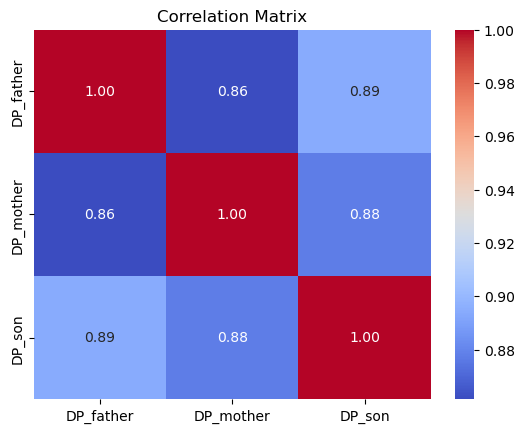

In [18]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

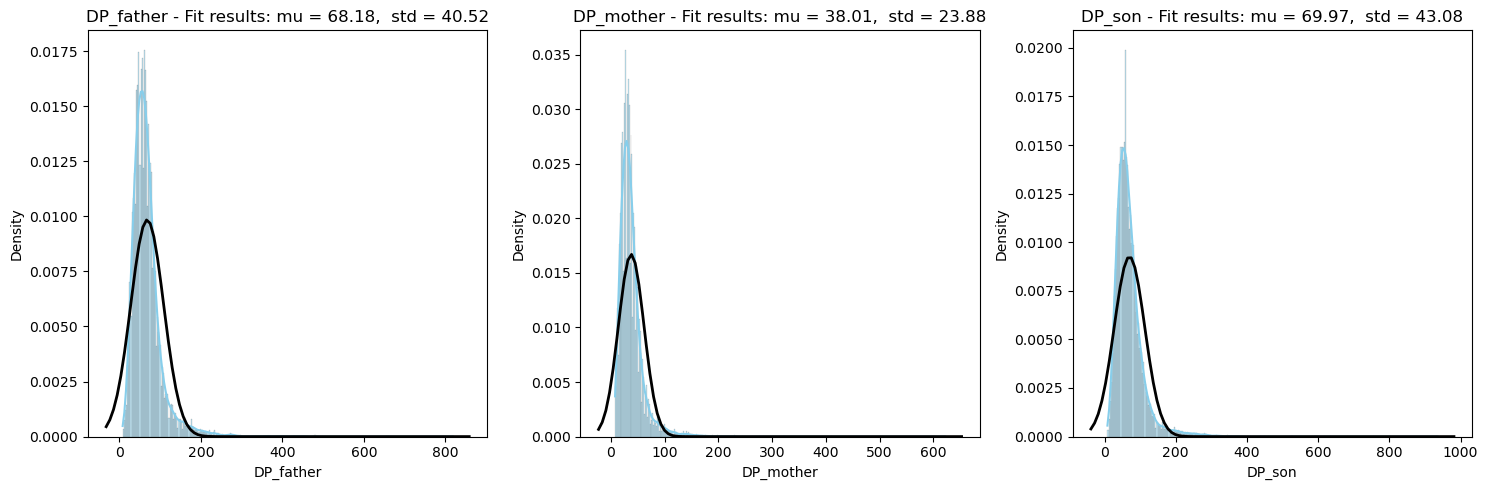

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df'
columns_to_plot = ['DP_father', 'DP_mother', 'DP_son']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Plotting bell curves for each column
for i, column in enumerate(columns_to_plot):
    # Plot the histogram
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue', stat='density')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(df[column])
    
    # Plot the PDF of the fitted normal distribution
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2)
    
    axes[i].set_title(f'{column} - Fit results: mu = {mu:.2f},  std = {std:.2f}')

plt.tight_layout()
plt.show()

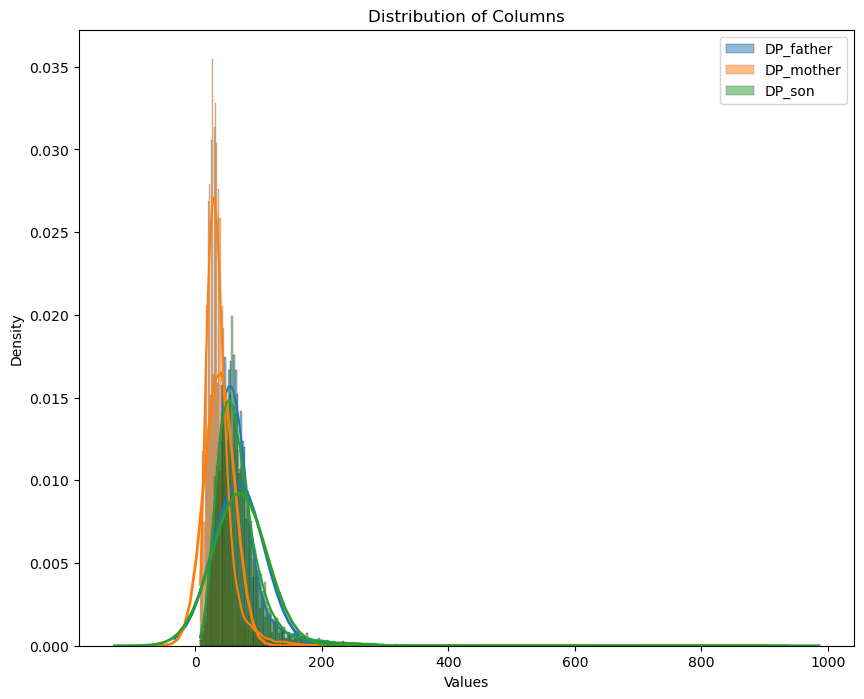

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df'
columns_to_plot = ['DP_father', 'DP_mother', 'DP_son']

# Set up the figure and axis with a wider figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting bell curves for each column with different colors
for column in columns_to_plot:
    # Plot the histogram and fit a normal distribution
    sns.histplot(df[column], kde=True, label=column, stat='density')

    mu, std = norm.fit(df[column])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, linewidth=2)

# Add legend and labels
ax.legend()
ax.set_title('Distribution of Columns')
ax.set_xlabel('Values')
ax.set_ylabel('Density')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df'
columns_to_plot = ['VAF_father', 'VAF_mother', 'VAF_son']

# Set up the figure and axis with a wider figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting bell curves for each column with different colors
for column in columns_to_plot:
    # Plot the histogram and fit a normal distribution
    sns.histplot(df[column], kde=True, label=column, stat='density')

    mu, std = norm.fit(df[column])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, linewidth=2)

# Add legend and labels
ax.legend()
ax.set_title('Distribution of Columns')
ax.set_xlabel('Values')
ax.set_ylabel('Density')

plt.show()


In [24]:
range_values_father = df['DP_father'].max() - df['DP_father'].min()
print(f'Range for DP_father: {range_values_father}')
range_values_mother = df['DP_mother'].max() - df['DP_mother'].min()
print(f'Range for DP_mother: {range_values_mother}')
range_values_son = df['DP_son'].max() - df['DP_son'].min()
print(f'Range for DP_son: {range_values_son}')

Range for DP_father: 810
Range for DP_mother: 614
Range for DP_son: 927


In [25]:
# Assuming you have a DataFrame 'df'
df['Same_DP'] = (df['DP_father'] == df['DP_mother']) & (df['DP_father'] == df['DP_son'])

# Display rows where DP values are the same in all three columns
same_dp_rows = df[df['Same_DP']]
print("Rows where DP values are the same in all three columns:")
same_dp_rows

Rows where DP values are the same in all three columns:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP
1144,chr1,214663767,C,G,rs7289,CENPF,Homozygous,Homozygous,Homozygous,25,0,25,1.000000,0.6146,0.7136,25,0,25,1.0,25,0,25,1.00,True
1732,chr10,96527504,G,C,rs3789957,TM9SF3,Homozygous,Heterozygous,Heterozygous,25,0,25,1.000000,0.6552,0.7136,25,10,15,0.6,25,9,16,0.64,True
4513,chr14,105767977,T,C,rs2983772,NaN,Homozygous,Homozygous,Homozygous,21,0,21,1.000000,0.9722,0.9972,21,0,21,1.0,21,0,21,1.00,True
4582,chr14,106592935,T,C,rs11623191,NaN,Heterozygous,Homozygous,Homozygous,19,8,11,0.578947,0.3236,0.5331,19,0,19,1.0,19,0,19,1.00,True
12349,chr6,49737469,G,A,rs2275597,CRISP3,Homozygous,Homozygous,Homozygous,8,0,8,1.000000,0.1080,0.2031,8,0,8,1.0,8,0,8,1.00,True


In [29]:
print(set(same_dp_rows['rsID']))

{'rs11623191', 'rs7289', 'rs2275597', 'rs3789957', 'rs2983772'}


In [26]:
# Assuming you have a DataFrame 'df'
df['Same_DP_F_M'] = (df['DP_father'] == df['DP_mother'])

# Display rows where DP values are the same in all three columns
same_dp_rows_F_M = df[df['Same_DP_F_M']]
print("Rows where DP values are the same in all three columns:")
same_dp_rows_F_M

Rows where DP values are the same in all three columns:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP,Same_DP_F_M
135,chr1,10654237,G,C,rs56322140,CASZ1,Homozygous,Heterozygous,Heterozygous,20,5,15,0.750000,0.08521,0.12840,20,8,12,0.600000,44,19,25,0.568182,False,True
171,chr1,13371759,A,G,rs1175110892,PRAMEF19,Homozygous,Heterozygous,Homozygous,62,0,62,1.000000,0.00000,0.00000,62,42,20,0.322581,68,0,68,1.000000,False,True
292,chr1,22506250,A,T,rs209732,ZBTB40,Heterozygous,Homozygous,Heterozygous,18,7,11,0.611111,0.69680,0.70580,18,0,18,1.000000,24,13,11,0.458333,False,True
565,chr1,75932287,C,T,rs3795251,ASB17,Homozygous,Homozygous,Homozygous,18,0,18,1.000000,0.38440,0.50160,18,0,18,1.000000,12,0,12,1.000000,False,True
908,chr1,169729684,T,G,rs1534904,SELE,Homozygous,Homozygous,Homozygous,29,0,29,1.000000,0.73960,0.81290,29,0,29,1.000000,28,0,28,1.000000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005,chrX,12919394,C,T,rs2159377,"TLR8,TLR8-AS1",Homozygous,Heterozygous,Homozygous,51,0,51,1.000000,0.27720,0.47050,51,23,28,0.549020,41,0,41,1.000000,False,True
15030,chrX,38108615,T,C,rs5918476,SYTL5,Homozygous,Heterozygous,Homozygous,29,0,29,1.000000,0.29120,0.35660,29,15,14,0.482759,23,0,23,1.000000,False,True
15102,chrX,72143565,C,T,rs6624597,"FLJ44635,NHSL2",Homozygous,Homozygous,Homozygous,34,0,34,1.000000,0.98260,0.99840,34,0,34,1.000000,40,0,40,1.000000,False,True
15107,chrX,74591904,A,G,rs201164156,RLIM,Heterozygous,Heterozygous,Heterozygous,53,31,22,0.415094,0.02134,0.01687,53,37,16,0.301887,73,56,17,0.232877,False,True


In [30]:
print(set(same_dp_rows_F_M['rsID']))

{'rs10814083', 'rs1435508633', 'rs998814', 'rs28417933', 'rs55985704', 'rs6439249', 'rs2665970', 'rs9835659', 'rs4570521', 'rs76052398', 'rs1046097', 'rs2275597', 'rs3928777', 'rs35022521', 'rs1175110892', 'rs712218', 'rs1534904', 'rs5763430', 'rs2939587', 'rs4594236', 'rs5918476', 'rs201164156', 'rs3796031', 'rs4078474', 'rs209732', 'rs1405069', 'rs7503190', 'rs945011', 'rs145971361', 'rs1847632', 'rs1848510', 'rs200295115', 'rs11247253', 'rs2042298', 'rs7176359', 'rs1131933', 'rs11767691', 'rs4148211', 'rs3733382', 'rs3789957', 'rs2952999', 'rs56322140', 'rs3795251', 'rs10999947', 'rs11817730', 'rs67047829', 'rs73976541', 'rs1395949', 'rs8036224', 'rs61106386', 'rs3750116', 'rs907357', 'rs932975', 'rs13733', 'rs868182586', 'rs4874160', 'rs1045362', 'rs2297880', 'rs11623191', 'rs7527', 'rs2159377', 'rs2074932', 'rs6624597', 'rs202716', 'rs2010519', 'rs7289', 'rs7165988', 'rs7961392', 'rs27742;rs45494797', 'rs2063573', 'rs28392896', 'rs28394186', 'rs7247102', 'rs1638630', 'rs2983772', 

In [27]:
# Assuming you have a DataFrame 'df'
df['Same_DP_F_S'] = (df['DP_father'] == df['DP_son'])

# Display rows where DP values are the same in all three columns
same_dp_rows_F_S = df[df['Same_DP_F_S']]
print("Rows where DP values are the same:")
same_dp_rows_F_S

Rows where DP values are the same:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP,Same_DP_F_M,Same_DP_F_S
97,chr1,6124032,A,G,rs2843493,CHD5,Homozygous,Homozygous,Homozygous,105,1,104,0.990476,0.651100,0.774700,73,0,73,1.000000,105,0,105,1.000000,False,False,True
143,chr1,11529854,G,A,rs2076468,DISP3,Heterozygous,Heterozygous,Homozygous,83,47,36,0.433735,0.154900,0.187000,44,24,20,0.454545,83,0,83,1.000000,False,False,True
198,chr1,16050613,G,C,rs35480349,CLCNKB,Heterozygous,Heterozygous,Heterozygous,45,26,19,0.422222,0.238800,0.311600,38,18,20,0.526316,45,18,27,0.600000,False,False,True
212,chr1,16564144,C,T,rs1043750;rs879151238,NaN,Heterozygous,Heterozygous,Heterozygous,139,83,56,0.402878,0.463600,0.480400,90,53,37,0.411111,139,78,60,0.434783,False,False,True
272,chr1,21831196,G,A,rs3736355,HSPG2,Homozygous,Homozygous,Homozygous,28,0,28,1.000000,0.791000,0.809100,19,0,19,1.000000,28,0,28,1.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15082,chrX,57909999,T,C,rs56863346,ZXDA,Homozygous,Homozygous,Homozygous,14,0,14,1.000000,0.002775,0.003019,20,0,20,1.000000,14,0,14,1.000000,False,False,True
15085,chrX,57910015,A,T,rs765984518,ZXDA,Homozygous,Homozygous,Homozygous,12,0,12,1.000000,0.000241,0.000413,16,0,16,1.000000,12,0,12,1.000000,False,False,True
15089,chrX,57910028,G,A,rs60293829,ZXDA,Homozygous,Homozygous,Homozygous,16,0,16,1.000000,0.016650,0.017380,19,0,19,1.000000,16,0,16,1.000000,False,False,True
15116,chrX,93672635,G,C,rs1045686,"FAM133A,NAP1L3",Homozygous,Heterozygous,Homozygous,52,0,52,1.000000,0.636400,0.684600,51,32,19,0.372549,52,0,52,1.000000,False,False,True


In [31]:
print(set(same_dp_rows_F_S['rsID']))

{'rs4947710', 'rs2269650', 'rs2960340', 'rs2275423', 'rs7562137', 'rs917118', 'rs2229604', 'rs7482279', 'rs199985195', 'rs5748623', 'rs616522', 'rs10006580', 'rs2241092', 'rs2032349', 'rs62389864', 'rs1062067', 'rs2282632', 'rs10421861', 'rs941590', 'rs7359662', 'rs12922275', 'rs1468138', 'rs17248', 'rs2301612', 'rs473351', 'rs1820128', 'rs4418629', 'rs2344829', 'rs8046613', 'rs7302981', 'rs1801052', 'rs2294404', 'rs1043750;rs879151238', 'rs1132173', 'rs36061247', 'rs2070488', 'rs357969', 'rs308925', 'rs1997368', 'rs3088379', 'rs300169', 'rs12900982', 'rs1984432', 'rs1874793', 'rs526106', 'rs11431', 'rs655025', 'rs1227747', 'rs633561', 'rs11212617', 'rs3003149', 'rs10799347', 'rs4682', 'rs3008326', 'rs7641844', 'rs1611762', 'rs2644225', 'rs3736355', 'rs2903150', 'rs56863346', 'rs17671352', 'rs7527925', 'rs5951328', 'rs9279', 'rs4148209', 'rs697133', 'rs11583410', 'rs7628051', 'rs1403626', 'rs633557', 'rs14224', 'rs11557955', 'rs4074537', 'rs1128322', 'rs7472', 'rs35480349', 'rs5758405'

In [28]:
# Assuming you have a DataFrame 'df'
df['Same_DP_M_S'] = (df['DP_mother'] == df['DP_son'])

# Display rows where DP values are the same in all three columns
same_dp_rows_M_S = df[df['Same_DP_M_S']]
print("Rows where DP values are the same:")
same_dp_rows_M_S

Rows where DP values are the same:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP,Same_DP_F_M,Same_DP_F_S,Same_DP_M_S
207,chr1,16062151,T,C,rs2863456,FAM131C,Homozygous,Heterozygous,Homozygous,76,0,76,1.000000,0.854900,0.860700,47,31,16,0.340426,47,0,47,1.000000,False,False,False,True
263,chr1,20724465,C,T,rs592060,SH2D5,Homozygous,Homozygous,Homozygous,39,0,39,1.000000,0.799300,0.831400,28,0,28,1.000000,28,0,28,1.000000,False,False,False,True
275,chr1,21878973,T,C,rs2454293,HSPG2,Homozygous,Homozygous,Homozygous,31,0,29,1.000000,0.989000,0.997600,25,0,25,1.000000,25,0,25,1.000000,False,False,False,True
657,chr1,111235619,C,T,rs2764544,CHI3L2,Homozygous,Homozygous,Homozygous,8,0,8,1.000000,0.991000,0.999800,9,0,9,1.000000,9,0,9,1.000000,False,False,False,True
912,chr1,170532244,A,C,rs7531125,"GORAB,LOC101928650",Homozygous,Homozygous,Homozygous,46,0,46,1.000000,0.982500,0.999500,33,0,33,1.000000,33,0,33,1.000000,False,False,False,True
935,chr1,173547764,A,G,rs10494490,SLC9C2,Heterozygous,Heterozygous,Heterozygous,29,15,14,0.482759,0.319300,0.351700,22,15,7,0.318182,22,6,16,0.727273,False,False,False,True
957,chr1,179551371,G,A,rs1410592,"AXDND1,NPHS2",Homozygous,Homozygous,Homozygous,33,0,33,1.000000,0.619000,0.603700,29,0,29,1.000000,29,0,29,1.000000,False,False,False,True
974,chr1,182382492,T,A,rs4517308,GLUL,Homozygous,Homozygous,Homozygous,25,0,25,1.000000,0.000000,0.000000,19,0,19,1.000000,19,0,19,1.000000,False,False,False,True
1133,chr1,212738494,T,C,rs15702,NSL1,Heterozygous,Homozygous,Homozygous,50,24,26,0.520000,0.626800,0.620600,32,0,32,1.000000,32,0,32,1.000000,False,False,False,True
1144,chr1,214663767,C,G,rs7289,CENPF,Homozygous,Homozygous,Homozygous,25,0,25,1.000000,0.614600,0.713600,25,0,25,1.000000,25,0,25,1.000000,True,True,True,True


In [32]:
print(set(same_dp_rows_M_S['rsID']))

{'rs1042787', 'rs11623191', 'rs3809528', 'rs27710', 'rs2863456', 'rs4629933', 'rs10494490', 'rs3088190', 'rs10770136', 'rs2301384', 'rs2454293', 'rs3789957', 'rs12909920', 'rs4931', 'rs1946586', 'rs7289', 'rs901554', 'rs427233', 'rs1249181', 'rs4925543', 'rs4285045', 'rs16907852', 'rs149033118', 'rs592060', 'rs557590', 'rs34196598', 'rs5927164', 'rs11757700', 'rs12916393', 'rs4842838', 'rs4486541', 'rs15702', 'rs6725956', 'rs4833069', 'rs5522', 'rs2235729', 'rs803455', 'rs2271891', 'rs2983772', 'rs2070779', 'rs5030900', 'rs2304832', 'rs1480361', 'rs2254420', 'rs6782766', 'rs2066474', 'rs1801311', 'rs7557', 'rs41310635', 'rs676210', 'rs3974500', 'rs1878784', 'rs1410592', 'rs581504', 'rs2275597', 'rs4634', 'rs2764544', 'rs4517308', 'rs7531125', 'rs2287432'}


In [33]:
# Assuming you have a DataFrame 'df'
df['Same_Zygosity'] = (df['Zygosity_father'] == df['Zygosity_mother']) & (df['Zygosity_father'] == df['Zygosity_son'])

# Display rows where DP values are the same in all three columns
same_zygo_rows = df[df['Same_Zygosity']]
print("Rows where Same_Zygosity values are the same in all three columns:")
same_zygo_rows

Rows where Same_Zygosity values are the same in all three columns:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP,Same_DP_F_M,Same_DP_F_S,Same_DP_M_S,Same_Zygosity
0,chr1,69270,A,G,rs201219564,OR4F5,Heterozygous,Heterozygous,Heterozygous,140,88,52,0.371429,0.8380,0.9005,44,16,28,0.636364,104,30,74,0.711538,False,False,False,False,True
1,chr1,69511,A,G,rs2691305,OR4F5,Homozygous,Homozygous,Homozygous,147,1,146,0.993197,0.9497,0.9854,133,0,133,1.000000,205,0,205,1.000000,False,False,False,False,True
2,chr1,69897,T,C,rs200676709,OR4F5,Heterozygous,Heterozygous,Heterozygous,137,99,38,0.277372,0.7209,0.8049,46,29,17,0.369565,93,28,65,0.698925,False,False,False,False,True
3,chr1,924533,A,G,rs112703963,"SAMD11,LOC107985728",Homozygous,Homozygous,Homozygous,93,0,93,1.000000,0.0000,0.0000,40,1,39,0.975000,81,0,80,1.000000,False,False,False,False,True
4,chr1,942451,T,C,rs6672356,SAMD11,Homozygous,Homozygous,Homozygous,80,0,80,1.000000,0.9999,0.9997,38,0,38,1.000000,98,0,98,1.000000,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15196,chrX,154467904,C,G,rs5987266,PLXNA3,Homozygous,Homozygous,Homozygous,59,0,59,1.000000,0.0000,0.0000,57,0,57,1.000000,49,0,49,1.000000,False,False,False,False,True
15197,chrX,154468570,T,C,rs7886727,PLXNA3,Homozygous,Homozygous,Homozygous,30,0,30,1.000000,0.0000,0.0000,35,0,35,1.000000,45,0,45,1.000000,False,False,False,False,True
15198,chrX,154485448,T,C,rs7057286,UBL4A,Homozygous,Homozygous,Homozygous,49,0,49,1.000000,0.0000,0.0000,75,0,75,1.000000,67,0,67,1.000000,False,False,False,False,True
15201,chrX,154653499,C,T,rs17855367,"CTAG2,LOC105373387",Heterozygous,Heterozygous,Heterozygous,59,28,31,0.525424,0.0000,0.0000,72,49,23,0.319444,86,41,45,0.523256,False,False,False,False,True


In [34]:
# Assuming you have a DataFrame 'df'
df['Different_Zygosity'] = (df['Zygosity_father'] != df['Zygosity_mother']) | (df['Zygosity_father'] != df['Zygosity_son'])

# Display rows where Zygosity values are different in at least one column
different_zygo_rows = df[df['Different_Zygosity']]
print("Rows where Zygosity values are different in at least one column:")
different_zygo_rows

Rows where Zygosity values are different in at least one column:


,CHROM,POS,REF,ALT,rsID,Gene_Name,Zygosity_father,Zygosity_mother,Zygosity_son,DP_father,RD_father,AD_father,VAF_father,gnomADe_AF,gnomADe_SAS_AF,DP_mother,RD_mother,AD_mother,VAF_mother,DP_son,RD_son,AD_son,VAF_son,Same_DP,Same_DP_F_M,Same_DP_F_S,Same_DP_M_S,Same_Zygosity,Different_Zygosity
23,chr1,1014228,G,A,rs1921,ISG15,Heterozygous,Homozygous,Homozygous,69,31,38,0.550725,0.35930,0.34040,38,0,38,1.000000,97,0,96,1.000000,False,False,False,False,False,True
26,chr1,1046551,A,G,rs2465128,AGRN,Heterozygous,Homozygous,Heterozygous,33,18,14,0.437500,0.88650,0.88850,34,0,34,1.000000,40,11,29,0.725000,False,False,False,False,False,True
30,chr1,1051063,C,T,rs2710887,AGRN,Heterozygous,Homozygous,Heterozygous,50,32,18,0.360000,0.89730,0.89210,28,0,28,1.000000,69,41,28,0.405797,False,False,False,False,False,True
31,chr1,1051820,C,T,rs9803031,AGRN,Heterozygous,Homozygous,Heterozygous,43,23,20,0.465116,0.88710,0.88280,41,0,40,1.000000,68,37,31,0.455882,False,False,False,False,False,True
33,chr1,1072052,G,A,rs4333796,RNF223,Homozygous,Heterozygous,Homozygous,64,0,64,1.000000,0.64580,0.58110,39,22,17,0.435897,84,0,84,1.000000,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15189,chrX,154190109,C,G,rs368356511,OPN1MW,Heterozygous,Heterozygous,Homozygous,49,36,13,0.265306,0.03718,0.03217,65,19,46,0.707692,83,0,83,1.000000,False,False,False,False,False,True
15190,chrX,154227247,C,G,rs371039245,OPN1MW2,Heterozygous,Heterozygous,Homozygous,58,38,20,0.344828,0.14010,0.06514,67,27,40,0.597015,82,0,82,1.000000,False,False,False,False,False,True
15191,chrX,154265051,C,G,.,NaN,Heterozygous,Heterozygous,Homozygous,47,30,17,0.361702,0.00000,0.00000,81,28,53,0.654321,95,0,95,1.000000,False,False,False,False,False,True
15199,chrX,154563953,C,T,rs201709278;rs5945206,IKBKG,Heterozygous,Homozygous,Homozygous,59,15,44,0.745763,0.00000,0.00000,35,0,35,1.000000,33,0,33,1.000000,False,False,False,False,False,True
